In [ ]:
# このコードは変更しない
!pip install -U ccml2021
# You must restart the runtimeとメッセージが出たら、ランタイムを再起動する

In [3]:
import rdkit
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

mols = [mol for mol in Chem.SDMolSupplier('solubility_2007.sdf') if mol is not None]
print('load {} molecules'.format(len(mols)))

[16:29:31] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[16:29:31] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[16:29:31] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[16:29:31] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[16:29:31] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[16:29:31] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[16:29:31] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[16:29:31] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[16:29:31] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol

load 1708 molecules


[16:29:31] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[16:29:31] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[16:29:31] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[16:29:31] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[16:29:31] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[16:29:31] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[16:29:31] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[16:29:31] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[16:29:31] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol

In [4]:
import pandas as pd
smiles = [Chem.MolToSmiles(mol) for mol in mols]
descriptor_names = [name for name, _ in Descriptors.descList]
calculator = MolecularDescriptorCalculator(descriptor_names)
X = pd.DataFrame(
    [calculator.CalcDescriptors(mol) for mol in mols],
    index=smiles,
    columns=descriptor_names
)

X = X.loc[:, X.columns.str.startswith('fr_')]
X = X.astype(np.float64)

X.dropna(axis=1, inplace=True)
y = np.array([float(mol.GetProp('EXPT')) for mol in mols])

In [20]:
X

,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
Brc1cccc2ccccc12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
N#Cc1cc(Br)c(O)c(Br)c1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brc1cc(Br)c(Br)cc1Br,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
COP(=S)(OC)Oc1cc(Cl)c(Br)cc1Cl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CON(C)C(=O)Nc1ccc(Br)c(Cl)c1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCOC(=O)C[C@H](SP(=S)(OC)OC)C(=O)OCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CCSSCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CSSC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CCN(CC)C(=S)SSC(=S)N(CC)CC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


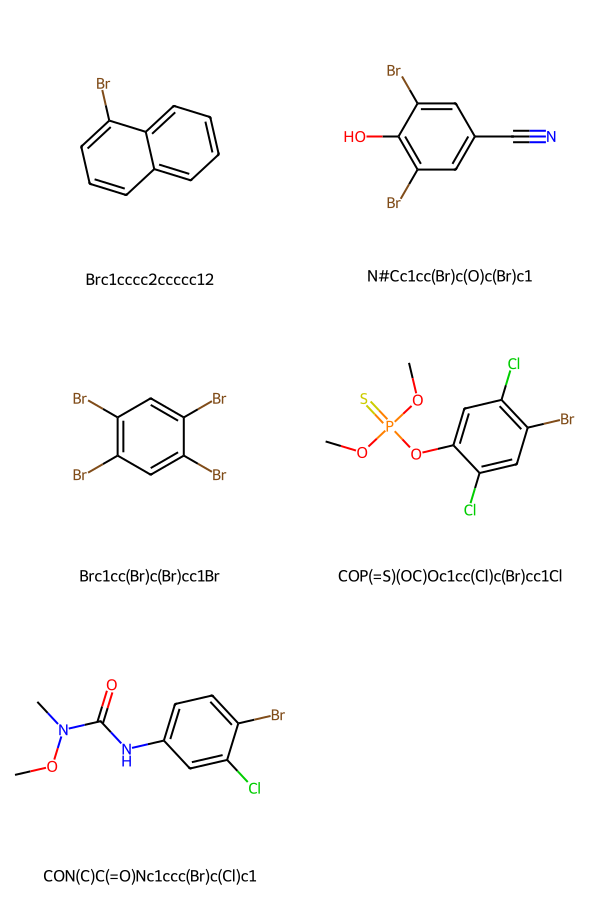

In [4]:
from rdkit.Chem import Draw
smiles_list = X.index[:5].tolist()

mols = [Chem.MolFromSmiles(s) for s in smiles_list]

img = Draw.MolsToGridImage(mols, molsPerRow=2, legends=smiles_list, subImgSize=(300, 300))
img

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()
scaler_X.fit(X_train)
scaler_y.fit(y_train.reshape(-1, 1))

X_train_scaled = scaler_X.transform(X_train)
y_train_scaled = scaler_y.transform(y_train.reshape(-1, 1))
X_test_scaled = scaler_X.transform(X_test)

In [6]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

models = {
    'PLS': GridSearchCV(
        PLSRegression(),
        param_grid={
            'n_components': [ii + 1 for ii in range(X_train.shape[1])],
        },
        cv=5,
    ),
    'SVR': GridSearchCV(
        SVR(),
        param_grid={
            'gamma': [2**ii for ii in range(-3, 3)],
            'C': [2**ii for ii in range(-3, 3)],
            'epsilon': [2**ii for ii in range(-3, 3)],
        },
        cv=5,
    ),
    'RF': RandomForestRegressor(n_estimators=500),
}

y_train_preds = {}
y_test_preds = {}
df_metrics = pd.DataFrame(
    index=models.keys(),
    columns=['R2(train)', 'MAE(train)', 'RMSE(train)', 'R2(test)', 'MAE(test)', 'RMSE(test)']
)

for name, model in models.items():
    model.fit(X_train_scaled, y_train_scaled.flatten())

    y_train_pred_scaled = model.predict(X_train_scaled)
    y_test_pred_scaled = model.predict(X_test_scaled)
    y_train_pred_scaled = y_train_pred_scaled.reshape(-1, 1)
    y_test_pred_scaled = y_test_pred_scaled.reshape(-1, 1)

    y_train_preds[name] = scaler_y.inverse_transform(y_train_pred_scaled)
    y_test_preds[name] = scaler_y.inverse_transform(y_test_pred_scaled)

    df_metrics.loc[name, 'R2(train)'] = r2_score(y_train, y_train_preds[name])
    df_metrics.loc[name, 'MAE(train)'] = mean_absolute_error(y_train, y_train_preds[name])
    df_metrics.loc[name, 'RMSE(train)'] = mean_squared_error(y_train, y_train_preds[name])
    df_metrics.loc[name, 'R2(test)'] = r2_score(y_test, y_test_preds[name])
    df_metrics.loc[name, 'MAE(test)'] = mean_absolute_error(y_test, y_test_preds[name])
    df_metrics.loc[name, 'RMSE(test)'] = mean_squared_error(y_test, y_test_preds[name])
df_metrics

,R2(train),MAE(train),RMSE(train),R2(test),MAE(test),RMSE(test)
PLS,0.734758,0.816708,1.148615,0.715785,0.850807,1.200057
SVR,0.944042,0.351732,0.242321,0.675304,0.857304,1.370985
RF,0.939364,0.365236,0.262578,0.776981,0.719749,0.941667


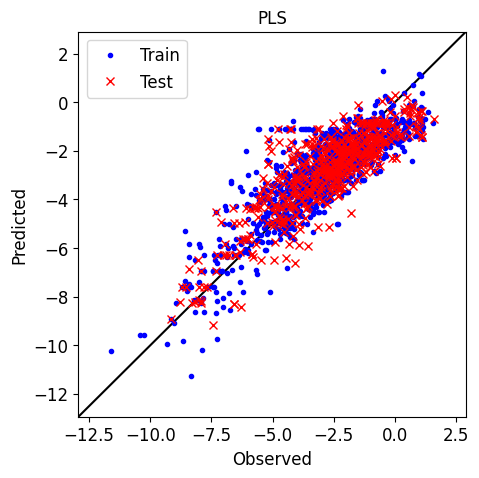

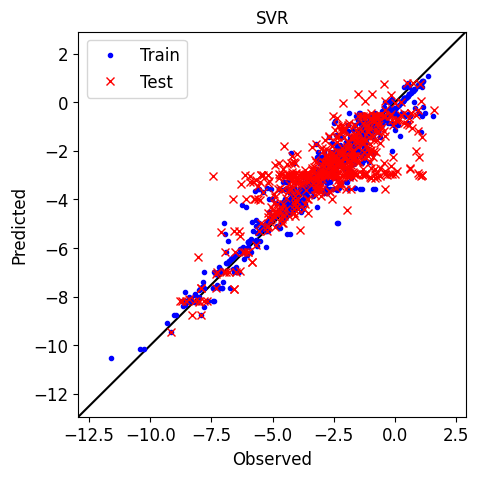

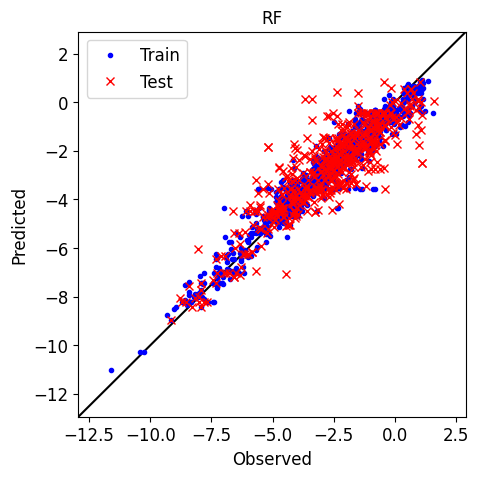

In [7]:
# 実数値-予測値プロット
import matplotlib.pyplot as plt

for name in ['PLS', 'SVR', 'RF']:
    y_train_pred = y_train_preds[name]
    y_test_pred = y_test_preds[name]

    min_val = min(
        min(y_train),
        min(y_train_pred),
        min(y_test),
        min(y_test_pred),
    )
    max_val = max(
        max(y_train),
        max(y_train_pred),
        max(y_test),
        max(y_test_pred),
    )
    margin = (max_val - min_val) * 0.1
    xy_lim = [min_val - margin, max_val + margin]

    fig = plt.figure(figsize=[5, 5])
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(xy_lim, xy_lim, 'k-')
    ax.plot(y_train, y_train_pred, 'b.', label='Train')
    ax.plot(y_test, y_test_pred, 'rx', label='Test')
    ax.set_xlim(xy_lim)
    ax.set_ylim(xy_lim)
    ax.set_xlabel('Observed', fontsize=12)
    ax.set_ylabel('Predicted', fontsize=12)
    ax.set_title(name, fontsize=12)
    ax.tick_params(labelsize=12)
    ax.legend(fontsize=12)
    fig.savefig('{}.png'.format(name))
    plt.show()

                  feature_importances
fr_benzene                   0.409415
fr_halogen                   0.137493
fr_unbrch_alkane             0.092732
fr_bicyclic                  0.066451
fr_NH0                       0.028676
fr_C_O                       0.018810
fr_ether                     0.016739
fr_allylic_oxid              0.016707
fr_aniline                   0.016411
fr_Al_OH                     0.013996


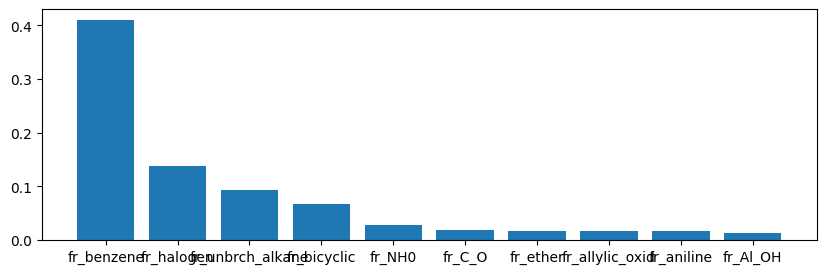

In [12]:
import pandas as pd

importance_RF = pd.DataFrame(
    {
        'feature_importances': models['RF'].feature_importances_,  
    },
    index = X.columns,
)
importance_RF.sort_values(
    'feature_importances',
    ascending=False,
    inplace=True,
)
top10 = importance_RF.head(10)
print(top10)
fig = plt.figure(figsize=[10, 3])
ax = fig.add_subplot(1, 1, 1)
ax.bar(top10.index, top10['feature_importances'])
fig.savefig('importance_RF.png')
plt.show()

## 考察記入欄

### 可視化した分子の官能機とフラグメント記述子の関係
['Brc1cccc2ccccc12', 'N#Cc1cc(Br)c(O)c(Br)c1', 'Brc1cc(Br)c(Br)cc1Br', 'COP(=S)(OC)Oc1cc(Cl)c(Br)cc1Cl', 'CON(C)C(=O)Nc1ccc(Br)c(Cl)c1']

特定の官能基（ニトリル、ハロゲン、アミドなど）の存在が、それぞれ対応するフラグメント記述子に数値として反映されると考えられる。

### 回帰モデルから重要度の高い説明変数を確認する
fr_bezeneは芳香族環を意味する記述子で疎水性の性質を持つので水溶解度に大きな影響を与えていることがわかり、これらは溶解度低下に影響があることは化学知識と合致する

## 感想記入欄

水溶解度のデータから回帰モデルを構築し、モデルから重要度の高い説明変数を抽出することで、各分子の部分構造が水溶解度に与える影響を観察できました。これにより、従来の科学知識と整合する結果と同時に、新たに気づく特徴量もあり興味深かったです。

## 変数名、ファイル名の最終チェック

以下のコードは変更しないでください。

実行することで、上のコードが想定通りの変数名、ファイル名を使用しているかをチェックできます。

In [ ]:
from ccml2021.checker import app1

app1(globals())